# e(BE:L) RESTful API client

## Summary:

This notebooks demonstrates the potential of the e(BE:L) RESTful API client. This client allows to query a database storing BEL and and eBEL statement. Statistics gives a general overview on the database.

#### Import Note!
For this notebook to function properly, you must have graphviz installed. For more information, visit https://graphviz.gitlab.io/download/

In [1]:
from ebel_rest import connect, query, statistics
import getpass
%matplotlib inline

## Example Database
To demonstrate how one can use this package to obtain information from a given database, we will use the COVID-19 Knowledge Graph available at http://graphstore.scai.fraunhofer.de/.  

In [2]:
# Database settings
server = "http://graphstore.scai.fraunhofer.de"
password = 'covid'
user = 'covid_user'
db_name = "covid"
print_url = True

# Connect to database
connect(user, password, server, db_name, print_url)

## Statistics

### Display
All statistics can be shown as
1. table (pandas.DataFrame)
3. _data (python object)

In [4]:
s = statistics.publication_by_year()

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_publication_by_year/


As a pandas DataFrame:

In [4]:
s.table[:20]

,publication_year,number_of_publications
0,2020,87
1,2019,4
2,2018,3
3,2016,2
4,2014,2
5,2013,1
6,2012,1
7,2011,2
8,2010,6
9,2009,5


As a python dictionary:

In [5]:
s.data

[{'publication_year': 2020, 'number_of_publications': 87},
 {'publication_year': 2019, 'number_of_publications': 4},
 {'publication_year': 2018, 'number_of_publications': 3},
 {'publication_year': 2016, 'number_of_publications': 2},
 {'publication_year': 2014, 'number_of_publications': 2},
 {'publication_year': 2013, 'number_of_publications': 1},
 {'publication_year': 2012, 'number_of_publications': 1},
 {'publication_year': 2011, 'number_of_publications': 2},
 {'publication_year': 2010, 'number_of_publications': 6},
 {'publication_year': 2009, 'number_of_publications': 5},
 {'publication_year': 2008, 'number_of_publications': 2},
 {'publication_year': 2007, 'number_of_publications': 5},
 {'publication_year': 2006, 'number_of_publications': 12},
 {'publication_year': 2005, 'number_of_publications': 9},
 {'publication_year': 2004, 'number_of_publications': 5},
 {'publication_year': 2003, 'number_of_publications': 1},
 {'publication_year': 2002, 'number_of_publications': 1},
 {'publicati

### Use pandas to visualize ebel_rest tables 

Because tables in `ebel_rest` are pandas tables, all [pandas visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) options are available. Here are 2 examples:

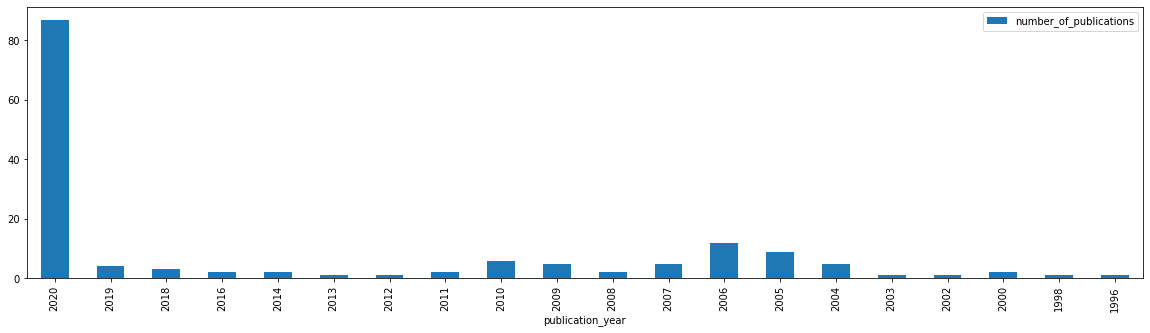

In [6]:
_=s.table.set_index('publication_year').plot.bar(figsize=(20,5))

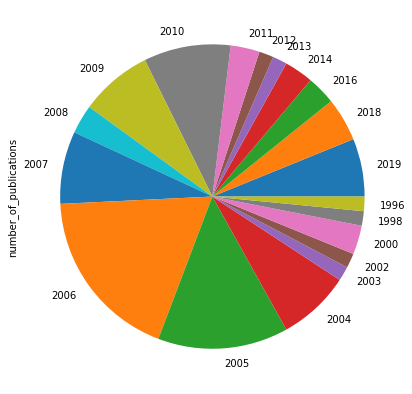

In [7]:
_=s.table[1:20].set_index('publication_year').plot.pie(y='number_of_publications', figsize=(7, 7),legend=None)

## Methods

To keep it simple on the first row for all statistic methods are shown.

### Total Number of Curated Publications

In [5]:
statistics.total_publications().data[0]

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_publications/


{'number_of_pubs': 153}

### Total Number of Curated BEL Statements

In [6]:
statistics.total_bel_edges().data[0]

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_stmts/


{'number_of_stmts': 4935}

### Total Number of BEL Nodes from Curated Statements

In [7]:
statistics.total_bel_nodes().data[0]

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_bel_nodes/


{'number_of_bel_nodes': 4210}

### Publications by year

In [8]:
statistics.publication_by_year().table[:2]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_publication_by_year/


,publication_year,number_of_publications
0,2020,87
1,2019,4


### Publication by number of statements

In [9]:
statistics.publication_by_number_of_statements().table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_publication_by_number_of_statements/


,pmid,last_author,title,journal,publication_date,number_of_statements
0,32228226,Chen Y,Transcriptomic characteristics of bronchoalveolar lavage fluid and peripheral blood mononuclear cells in COVID-19 patients.,Emerging microbes & infections,2020-04-02,641


### Last author by number of publications

In [10]:
statistics.last_author_by_number_of_publications().table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_last_author_by_number_of_publications/


,last_author,number_of_publications
0,Ning Q,2


### Author by number of statements

In [11]:
statistics.last_author_by_number_of_statements().table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_last_author_by_number_of_statements/


,last_author,number_of_bel_statements
0,Chen Y,641


### Node namespace ordered by count

In [12]:
statistics.node_namespace_order_by_count().table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_node_namespace_order_by_count/


,node_class,namespace,count
0,protein,HGNC,546


### Node namespace ordered by namespace

In [13]:
statistics.node_namespace_order_by_namespace().table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_node_namespace_order_by_namespace/


,node_class,namespace,count
0,abundance,CHEBI,223


### Edge classes

In [14]:
statistics.edges().table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_edges/


,number_of_edges,edge_class
0,1178,decreases


### Node classes

In [15]:
statistics.nodes().table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_nodes/


,number_of_nodes,node_class
0,1096,complex


## Graphs

All graph data can be retrieved as
1. edges (python object => list of dictionaries)
2. table (pandas.DataFrame)
2. table_all_columns (pandas.DataFrame)

See below the graph view possibilities.

### Graph queries

In [17]:
query.annotation('MeSHAnatomy', 'Lysosomes').edges[0]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_by_annotation/MeSHAnatomy/Lysosomes


{'@type': 'd',
 '@rid': '#-2:0',
 '@version': 0,
 'subject_bel': 'bp(GOBP:"endosome lysis involved in viral entry into host cell")',
 'subject_involved_genes': [],
 'subject_involved_other': ['endosome lysis involved in viral entry into host cell'],
 'subject_class': 'biological_process',
 'subject_id': '#82:96',
 'relation': 'increases',
 'pmid': 0,
 'edge_id': '#567:279',
 'evidence': 'The infection of SARS virus is initiated by the attachment of S protein to the receptor ACE2 [19], followed by cleavage with host cell protease TMPRSS2 [20-22]. The viruses are then transported through the early and late endosomes, subsequently endo/lysosomes, during which host protein extracellular proteases including cathepsin L mediates the further cleavage of S protein in endocytic vesicles [23-26]. The activated S protein will then activate the fusion between viral and cell membranes and release the genome of SARS-CoV into cytoplasm.',
 'title': '',
 'publication_date': '',
 'annotation': {'MeSHAn

#### Ouery by last author

In [19]:
query.last_author('Denison MR').table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_by_last_author/Denison%20MR/


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#554:214,"p(UNIPROT:""P0C6X7"",frag(""819_2740""))",increases,"bp(GO:""RNA biosynthetic process"")",17397959


#### Query by PubMed identifier

In [20]:
query.pmid(32129518).table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_by_pmid/32129518


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#554:211,"act(p(HGNC:""ACE""),ma(cat))",increases,"rxn(reactants(a(CHEBI:""Angiotensin I"")),products(a(CHEBI:""angiotensin II"")))",32129518


#### Causal & correlative relations by gene symbol

In [21]:
query.causal_correlative_by_gene('ACE2').table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_causal_correlative_by_gene/ACE2


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#558:271,"act(p(HGNC:""TMPRSS2""))",increases,"p(HGNC:""ACE2"",frag(""?""))",0


#### All causal paths from gene 1 to gene 2 with causal relations 

In [22]:
query.path(from_gene='EIF2S1',to_gene='STAT1',min_edges=1,max_edges=2).table[:1]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_path/EIF2S1/STAT1/1-2


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#594:206,"p(HGNC:""EIF2S1"",pmod(Ph))",decreases,"act(p(HGNC:""ATF6""))",24987391


#### BELish

In [23]:
query.belish('p(HGNC:"IFNB1") ? ?').table

http://graphstore.scai.fraunhofer.de/function/covid/_belish/p%28HGNC%3A%22IFNB1%22%29%20%3F%20%3F


'No results'

### Graph display

In [24]:
g = query.pmid(32129518)

http://graphstore.scai.fraunhofer.de/function/covid/_bel_by_pmid/32129518


#### Table

In [25]:
g.table[:5]

,subject_bel,relation,object_bel,pmid
edge_id,,,,
#554:211,"act(p(HGNC:""ACE""),ma(cat))",increases,"rxn(reactants(a(CHEBI:""Angiotensin I"")),products(a(CHEBI:""angiotensin II"")))",32129518
#554:212,"a(PUBCHEM:""123805"")",increases,"bp(GO:""vasodilation"")",32129518
#555:210,"complex(a(CHEBI:""angiotensin II""),p(HGNC:""AGTR1""))",increases,"act(p(HGNC:""AGTR1""))",32129518
#556:210,"act(p(HGNC:""AGTR1""))",increases,"bp(GO:""vasoconstriction"")",32129518
#557:210,"bp(GO:""vasoconstriction"")",increases,"bp(MESH:""Blood Pressure"")",32129518


#### Table (comprehensive)

In [26]:
g.table_all_columns

,subject_bel,relation,object_bel,annotation,last_author,publication_date,title,evidence,pmid
edge_id,,,,,,,,,
#554:211,"act(p(HGNC:""ACE""),ma(cat))",increases,"rxn(reactants(a(CHEBI:""Angiotensin I"")),products(a(CHEBI:""angiotensin II"")))","{'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative SARS-CoV-2 therapeutics.,"ACE cleaves angiotensin I to generate angiotensin II, the peptide which binds to and activates AT1R to constrict blood vessels, thereby elevating blood pressure.",32129518
#554:212,"a(PUBCHEM:""123805"")",increases,"bp(GO:""vasodilation"")","{'Custom_Disease': ['COVID-19'], 'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative SARS-CoV-2 therapeutics.,"This may be accounted for by two complementary mechanisms: blocking the excessive angiotensin-mediated AT1R activation caused by the viral infection, as well as upregulating ACE2, thereby reducing angiotensin production by ACE and increasing the production of the vasodilator angiotensin 1–7.",32129518
#555:210,"complex(a(CHEBI:""angiotensin II""),p(HGNC:""AGTR1""))",increases,"act(p(HGNC:""AGTR1""))","{'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative SARS-CoV-2 therapeutics.,"ACE cleaves angiotensin I to generate angiotensin II, the peptide which binds to and activates AT1R to constrict blood vessels, thereby elevating blood pressure.",32129518
#556:210,"act(p(HGNC:""AGTR1""))",increases,"bp(GO:""vasoconstriction"")","{'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative SARS-CoV-2 therapeutics.,"ACE cleaves angiotensin I to generate angiotensin II, the peptide which binds to and activates AT1R to constrict blood vessels, thereby elevating blood pressure.",32129518
#557:210,"bp(GO:""vasoconstriction"")",increases,"bp(MESH:""Blood Pressure"")","{'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative SARS-CoV-2 therapeutics.,"ACE cleaves angiotensin I to generate angiotensin II, the peptide which binds to and activates AT1R to constrict blood vessels, thereby elevating blood pressure.",32129518
#558:210,"act(p(HGNC:""ACE2""))",increases,"a(PUBCHEM:""123805"")","{'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative SARS-CoV-2 therapeutics.,"By contract, ACE2 inactivates angiotensin II while generating angiotensin 1–7, a heptapeptide having a potent vasodilator function via activation of its Mas receptor (Santos et al., 2003), and thus serving as a negative regulator of the renin–angiotensin system.",32129518
#559:210,"a(PUBCHEM:""123805"")",increases,"act(p(HGNC:""MAS1""))","{'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative SARS-CoV-2 therapeutics.,"By contract, ACE2 inactivates angiotensin II while generating angiotensin 1–7, a heptapeptide having a potent vasodilator function via activation of its Mas receptor (Santos et al., 2003), and thus serving as a negative regulator of the renin–angiotensin system.",32129518
#560:210,"act(p(HGNC:""MAS1""))",increases,"bp(GO:""vasodilation"")","{'PublicationStatus': ['Published'], 'PublicationType': ['Commentary'], 'Section': ['Full Text'], 'Species': ['9606']}",Gurwitz D,2020-03-04,Angiotensin receptor blockers as tentative 

#### BEL graph (simplified)

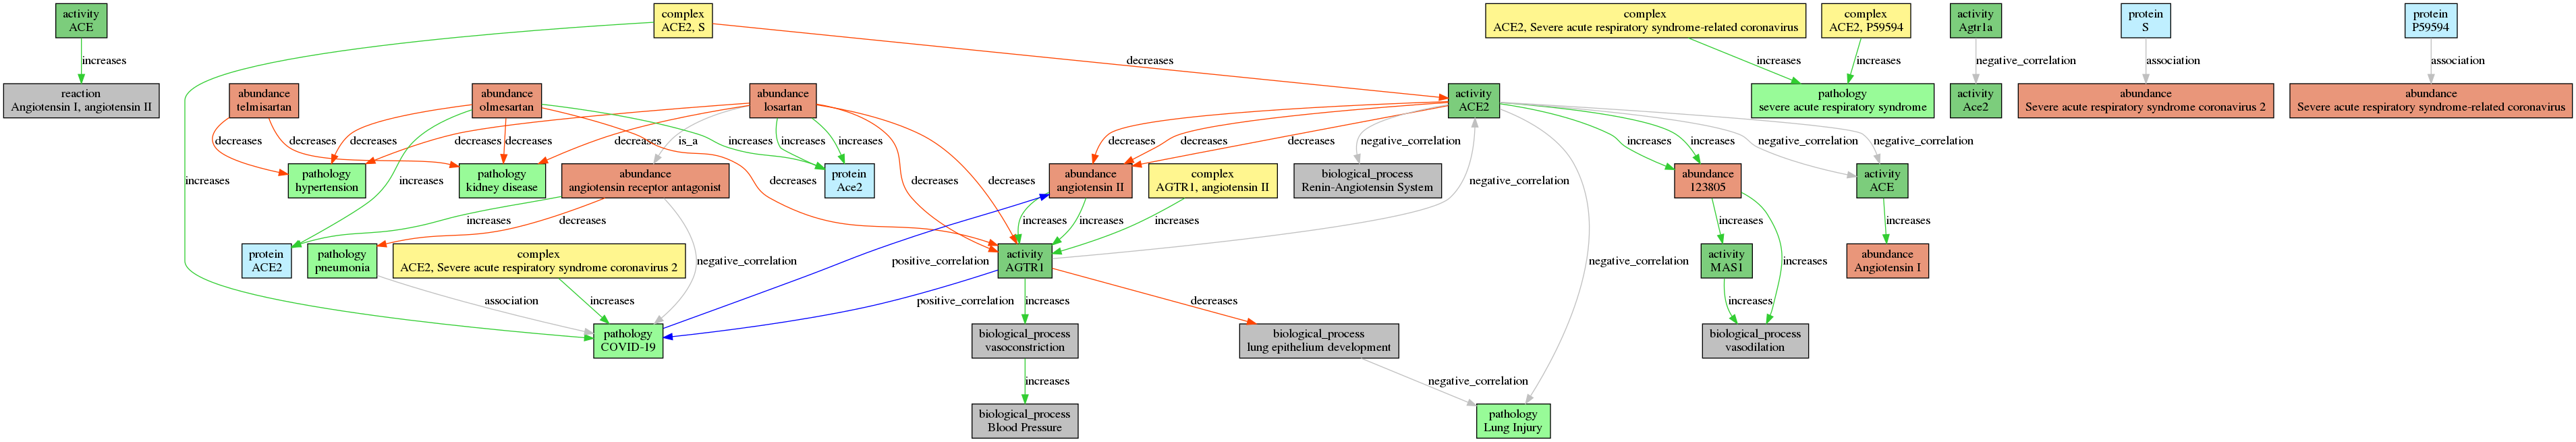

In [27]:
g.as_graph()

#### BEL graph (simplified with edge IDs)

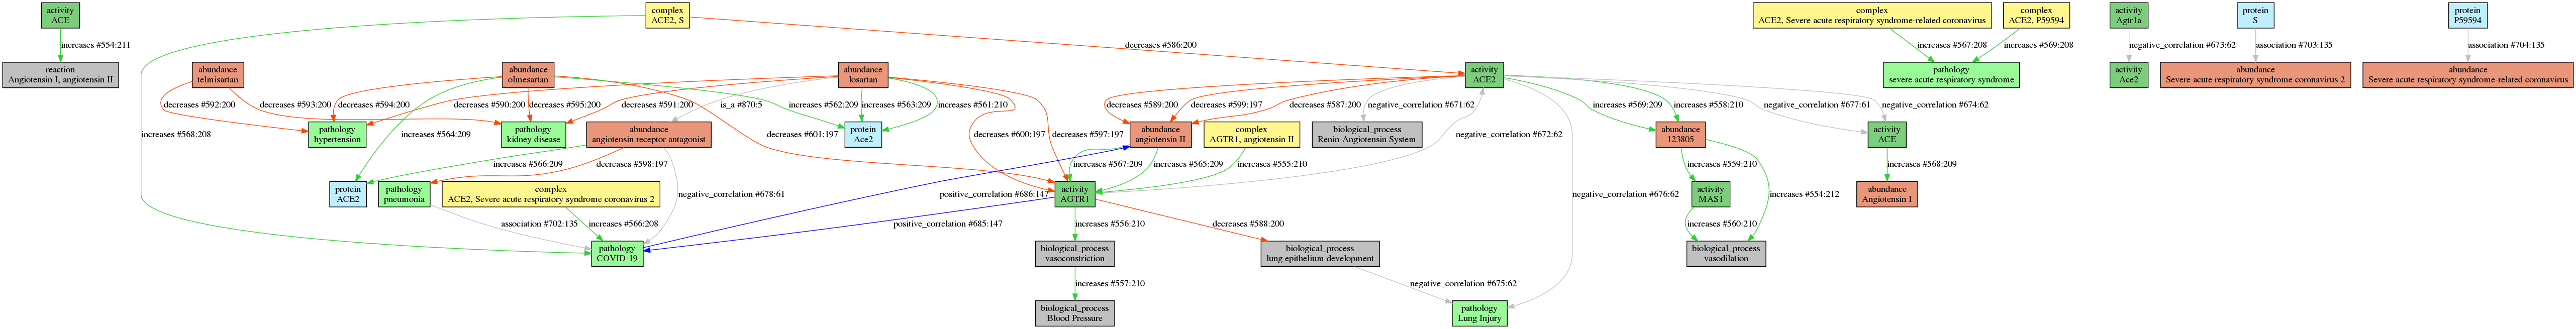

In [28]:
g.as_graph_with_ids()

#### BEL graph (with node labels as BEL)

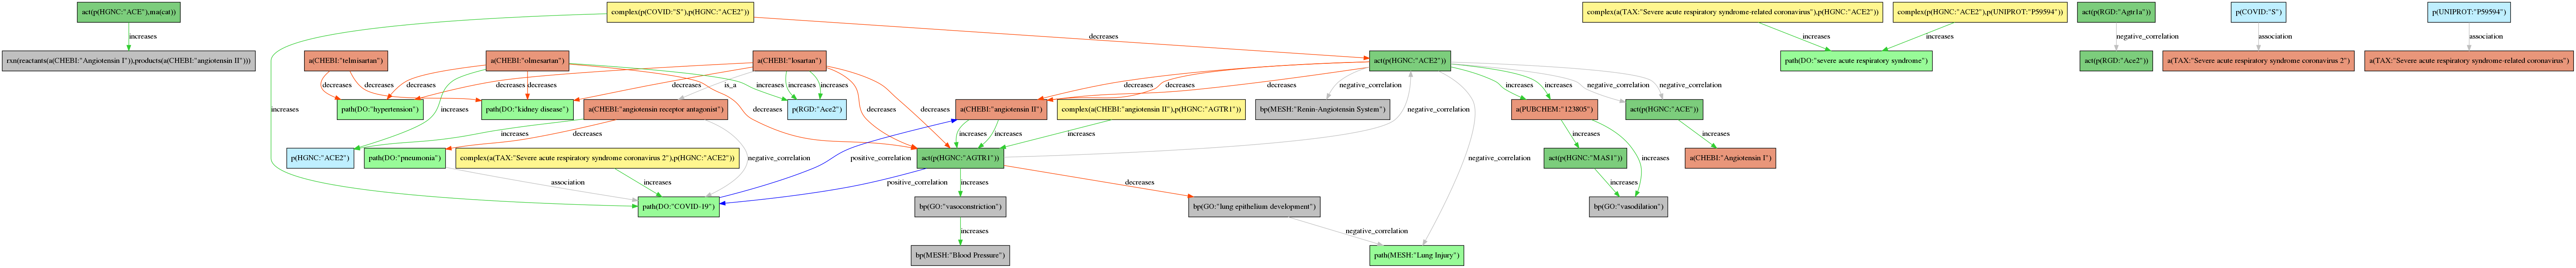

In [29]:
g.as_graph_bel()

#### BEL graph (with node labels as BEL and edge IDs)

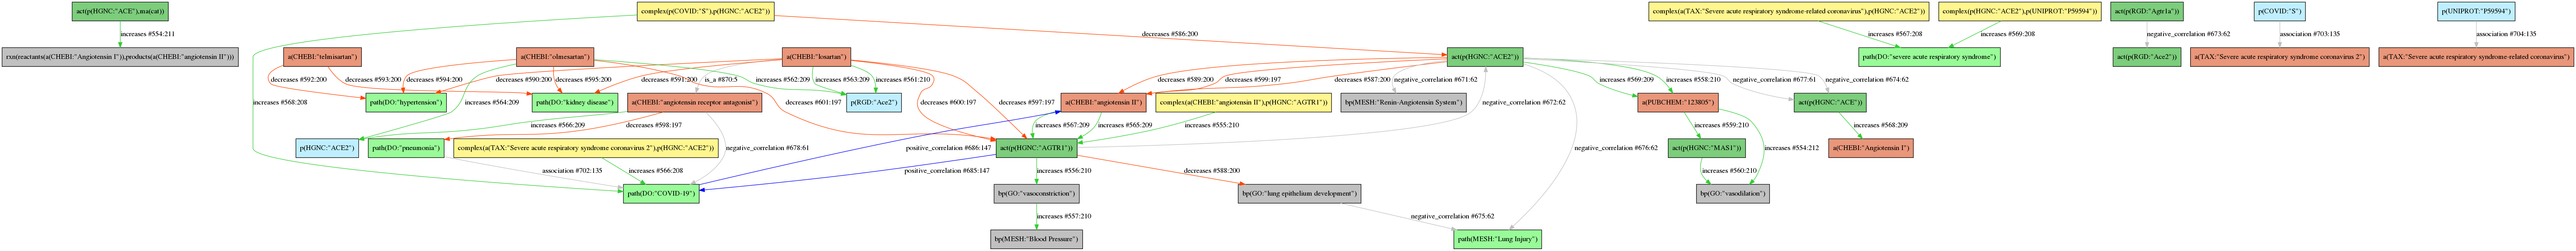

In [30]:
g.as_graph_bel_with_ids()